# I. Introduction
**Name** : Dafa Wiratama
**Batch** : Data Science - Batch 09

# II. Question Marker
>## Problems
>1. Buatlah model linear regression untuk memprediksi closing price saham Amazon ([Dataset URL](https://www.kaggle.com/dgawlik/nyse?select=prices-split-adjusted.csv)). Gunakan file `prices-split-adjusted.csv` dalam kasus ini.
>
>2. Buatlah visualisasi yang menampilkan closing price saham `Amazon`, `Cisco`, `Apple`, dan `Netflix` berdasarkan `date` (time series). Saham apa yang memiliki closing price tertinggi dan terendah di akhir tahun 2014, 2015 dan 2016?
>
>3. Buatlah model Logistic Regression untuk memprediksi Loan Pay Back ([Dataset URL](https://www.kaggle.com/sarahvch/predicting-who-pays-back-loans?select=loan_data.csv)). Gunakan file `loan_data.csv` dalam kasus ini.
>
>4. Dengan dataset nomor 3, carilah jumlah `fully paid` tertinggi dan terendah berdasarkan `purpose`.


# III. Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, linear_model, metrics, model_selection, pipeline, compose

# IV. Data Loading

In [2]:
prices_split_adjusted_df = pd.read_csv('datasets/new_york_stock_exchange/prices-split-adjusted.csv')
prices_split_adjusted_df

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [3]:
prices_split_adjusted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [4]:
prices_split_adjusted_df['date'] = pd.to_datetime(prices_split_adjusted_df['date'])
prices_split_adjusted_df = prices_split_adjusted_df.set_index('date')

In [5]:
loan_data_df = pd.read_csv('datasets/pay_back_loans/loan_data.csv')
loan_data_df['fully_paid'] = loan_data_df['not.fully.paid'].map({0: 1, 1: 0})
loan_data_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0


# V. Exploratory Data Analysis

> ## Stock Exchange
> 1. Visualisasi closing price saham `Amazon`, `Cisco`, `Apple`, dan `Netflix` berdasarkan `date` (time series).

In [6]:
stock_of_interests = ['AMZN', 'CSCO', 'AAPL', 'NFLX']

### Buatlah visualisasi yang menampilkan closing price saham Amazon, Cisco, Apple, dan Netflix berdasarkan date (time series). Saham apa yang memiliki closing price tertinggi dan terendah di akhir tahun 2014, 2015 dan 2016?

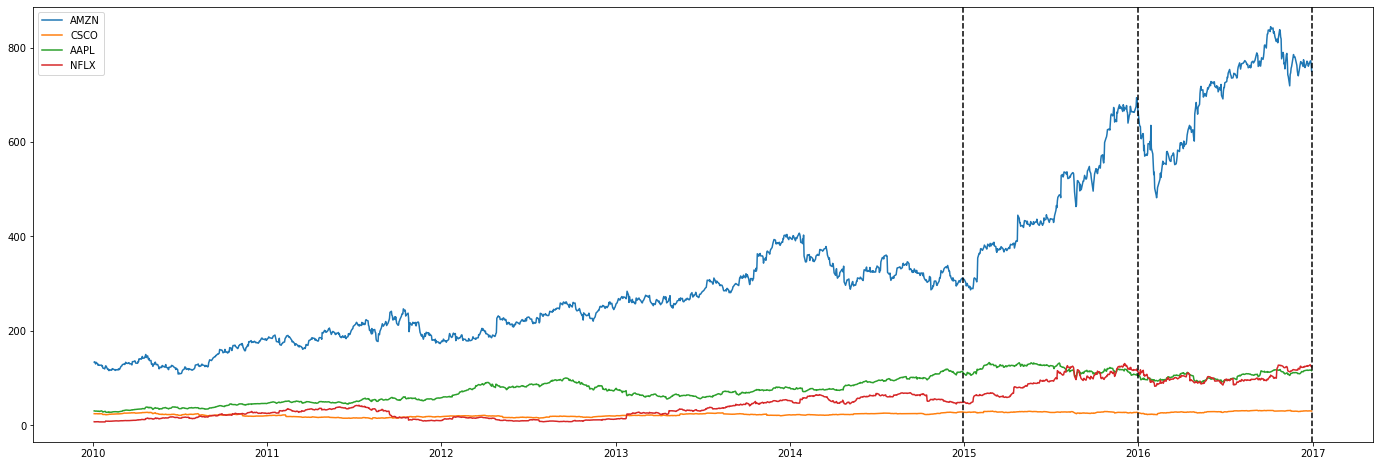

In [7]:
_year_of_interest = [2014, 2015, 2016]

plt.figure(figsize=(8 * 3, 8))
for stock_of_interest in stock_of_interests:
    stock_of_interest_df = prices_split_adjusted_df[prices_split_adjusted_df['symbol'] == stock_of_interest]
    plt.plot(stock_of_interest_df.index, stock_of_interest_df['close'], label=stock_of_interest)

end_of_year_df = []
for year_of_interest in _year_of_interest:
    end_of_year = prices_split_adjusted_df[prices_split_adjusted_df.index.year == year_of_interest].index.max()
    stock_lists = prices_split_adjusted_df[(prices_split_adjusted_df.index == end_of_year)]
    filtered = stock_lists[stock_lists['symbol'].isin(stock_of_interests)]
    _min_close = filtered['close'].min()
    _min_company = filtered['symbol'][filtered['close'] == _min_close].values[0]
    _max_close = filtered['close'].max()
    _max_company = filtered['symbol'][filtered['close'] == _max_close].values[0]
    end_of_year_df.append({
        'year': year_of_interest,
        'min_close': _min_close, 'max_close': _max_close,
        'min_company': _min_company, 'max_company': _max_company
    })
    plt.axvline(end_of_year, color='black', linestyle='--')
plt.legend()

In [8]:
end_of_year_df = pd.DataFrame(end_of_year_df).set_index('year')
end_of_year_df

,min_close,max_close,min_company,max_company
year,,,,
2014,27.820000,310.350006,CSCO,AMZN
2015,27.160000,675.890015,CSCO,AMZN
2016,30.219999,749.869995,CSCO,AMZN


In [9]:
prices_split_adjusted_df.corr()['close'].abs().sort_values(ascending=False)

close     1.000000
low       0.999926
high      0.999925
open      0.999845
volume    0.132675
Name: close, dtype: float64

## Column Analysis
> As we can see from the histogram plot almost all of the column  are not normally distributed. but have some correlation to the close price.

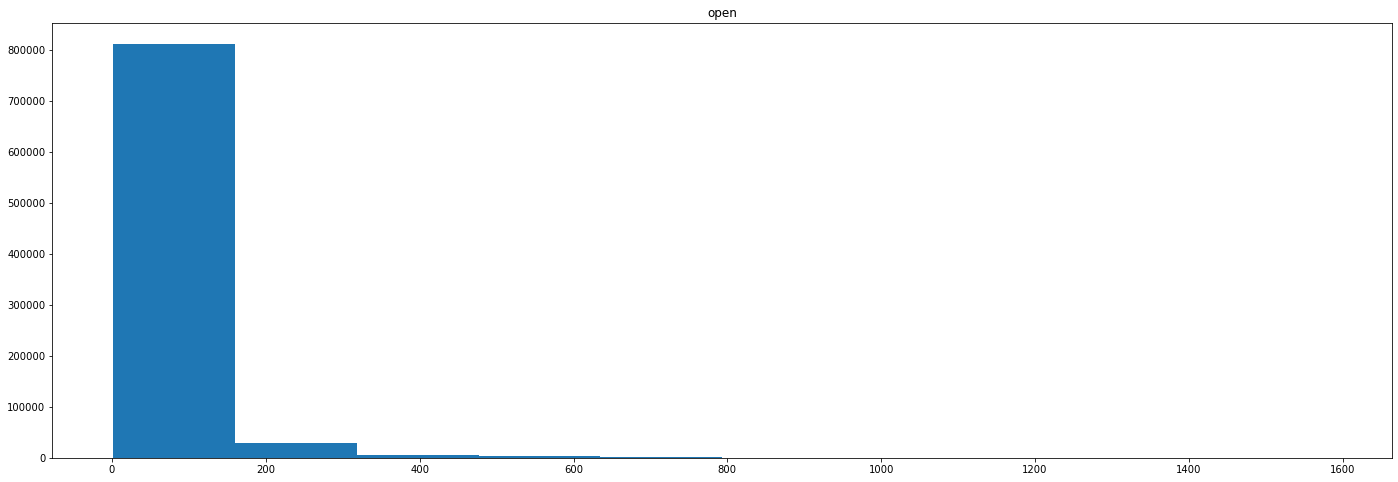

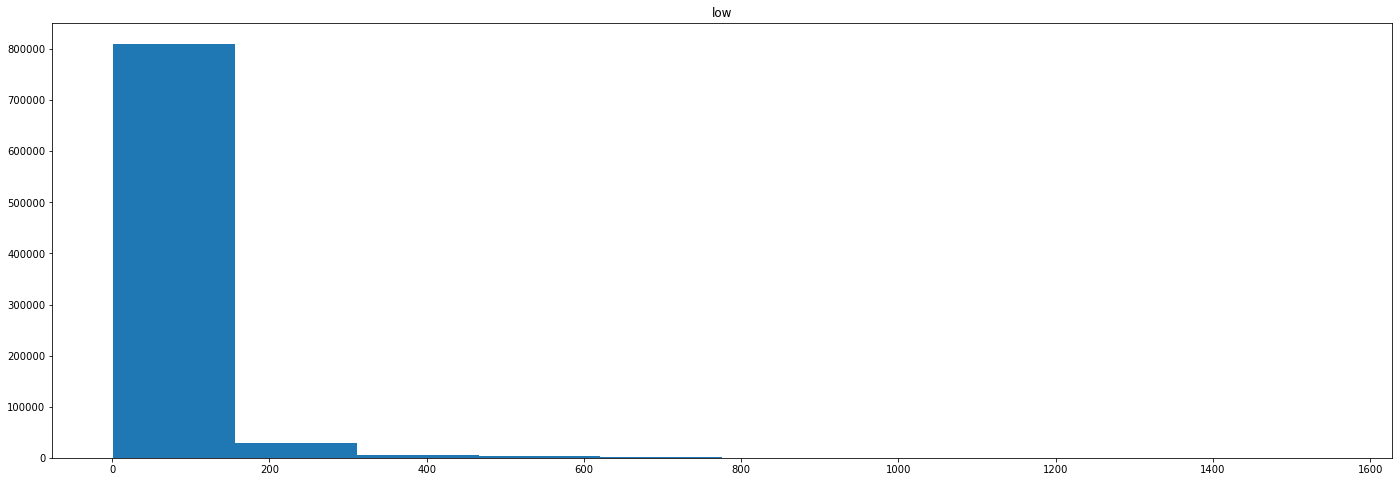

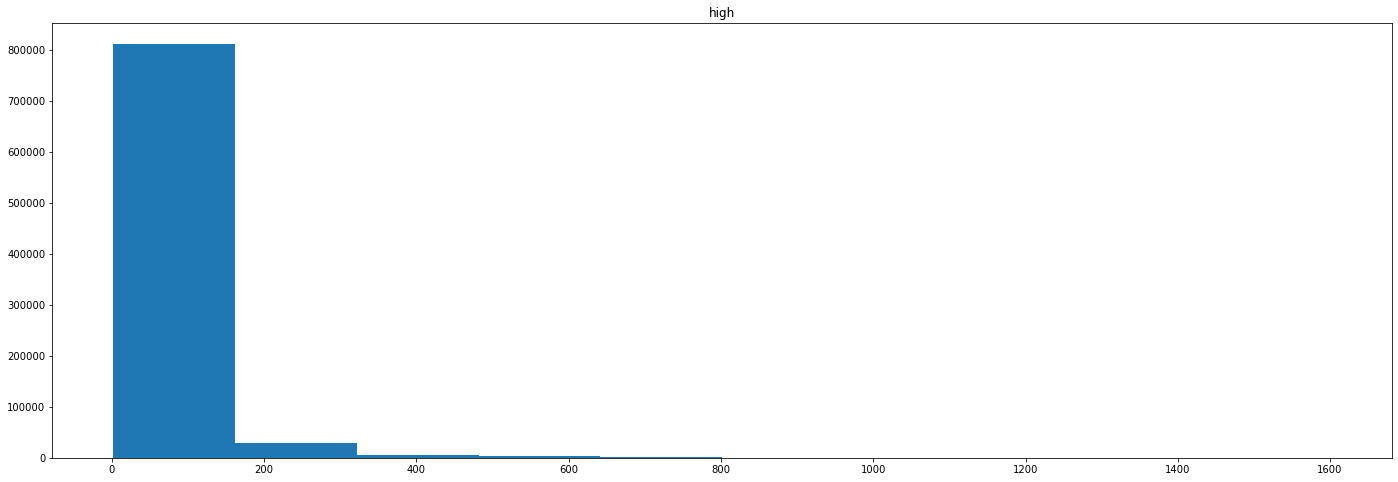

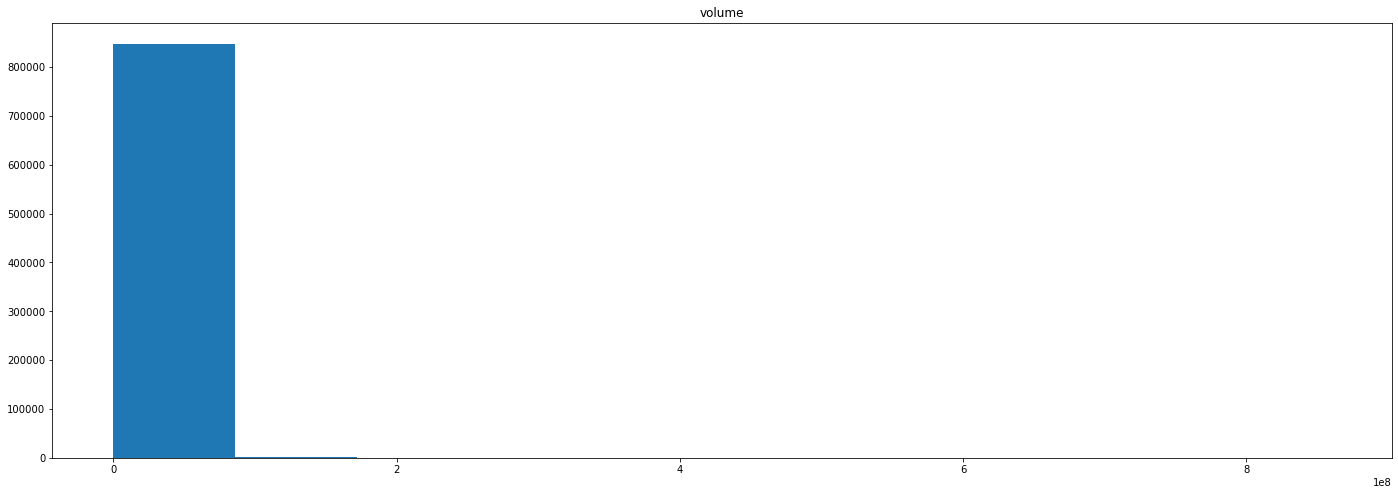

In [10]:
for col in prices_split_adjusted_df.columns:
    if col != 'close' and col != 'symbol':
        plt.figure(figsize=(8 * 3, 8))
        plt.hist(prices_split_adjusted_df[col])
        plt.title(col)
        plt.show()

### Dengan dataset nomor 3, carilah jumlah fully paid tertinggi dan terendah berdasarkan purpose.

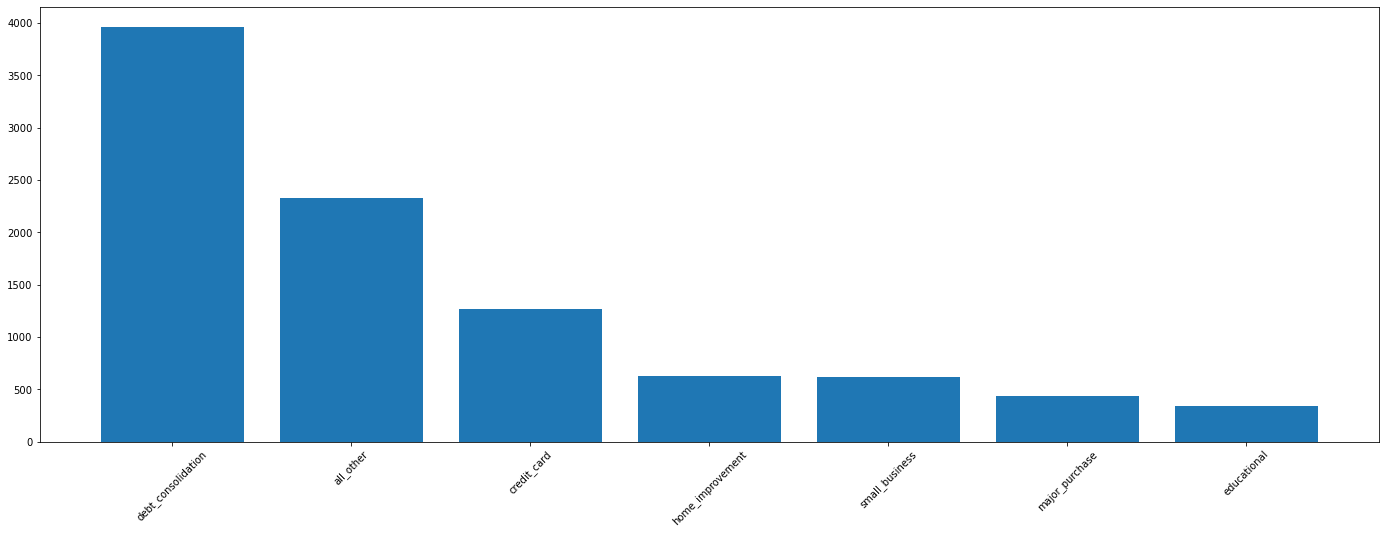

In [11]:
_fully_paid_vs_purpose = loan_data_df.groupby('purpose').agg({'fully_paid': 'count'}).sort_values('fully_paid', ascending=False)

plt.figure(figsize=(8 * 3, 8))
plt.bar(_fully_paid_vs_purpose.index, _fully_paid_vs_purpose['fully_paid'])
plt.xticks(rotation=45);

## Column Analysis
as we can see that some column is has skewed distribution but still have high correlation with the close price.


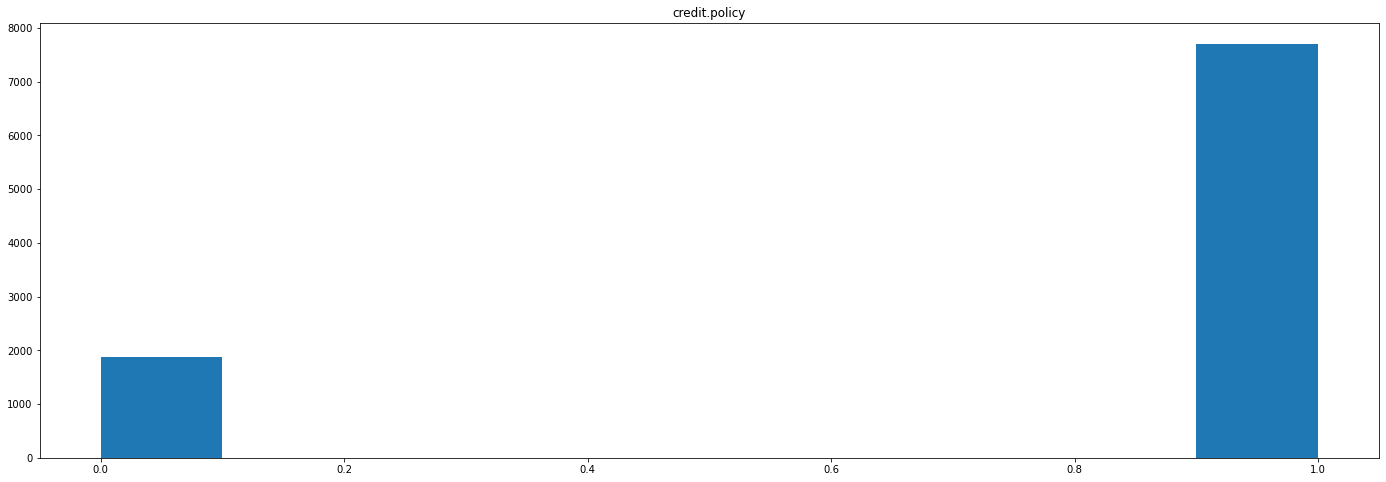

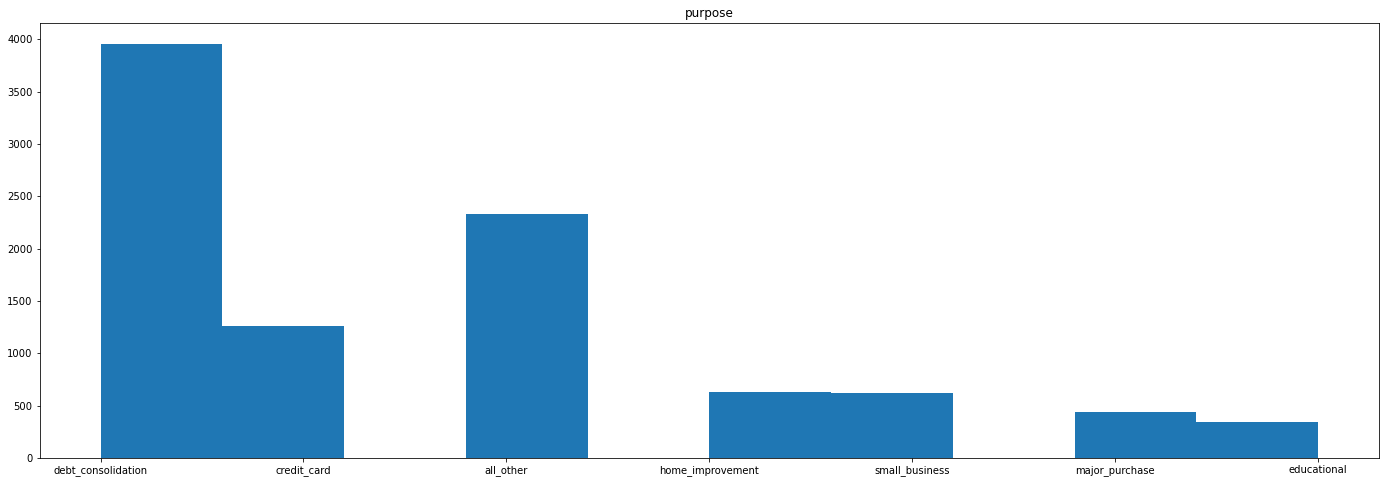

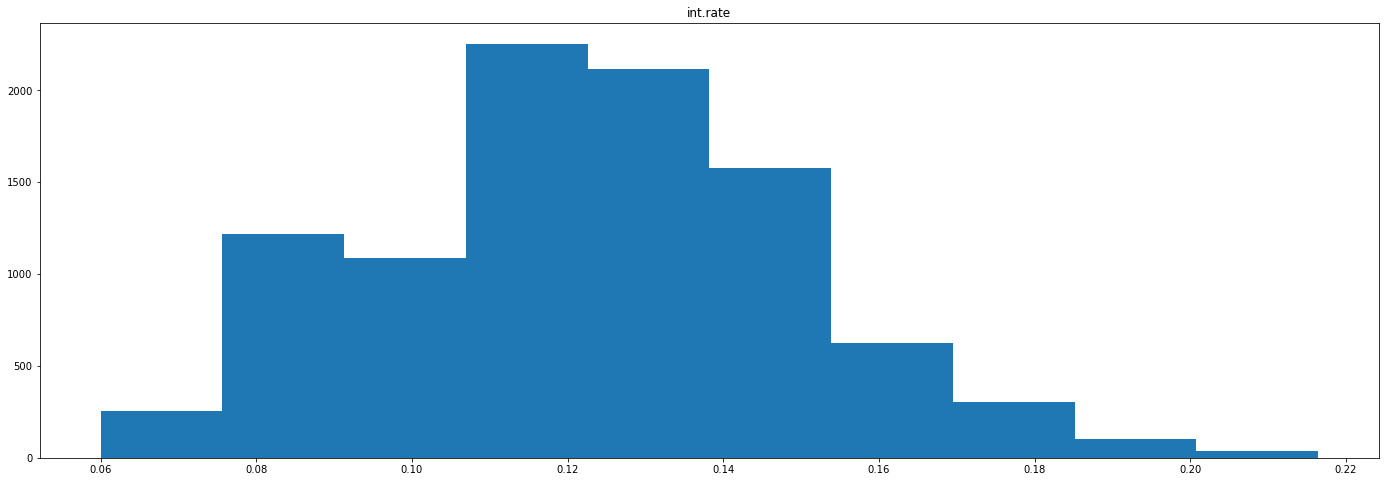

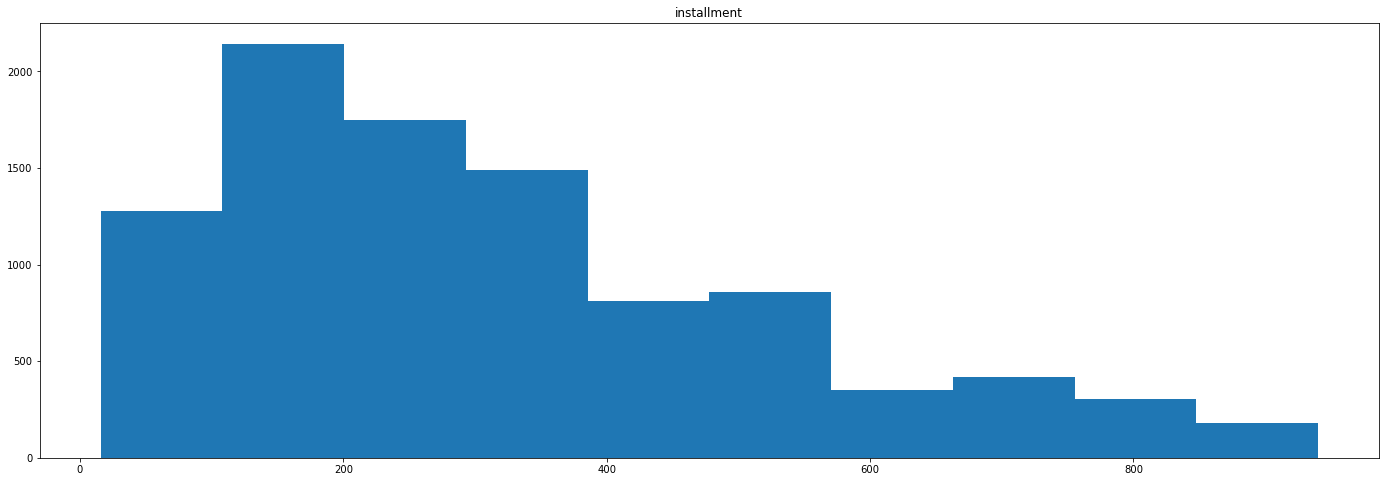

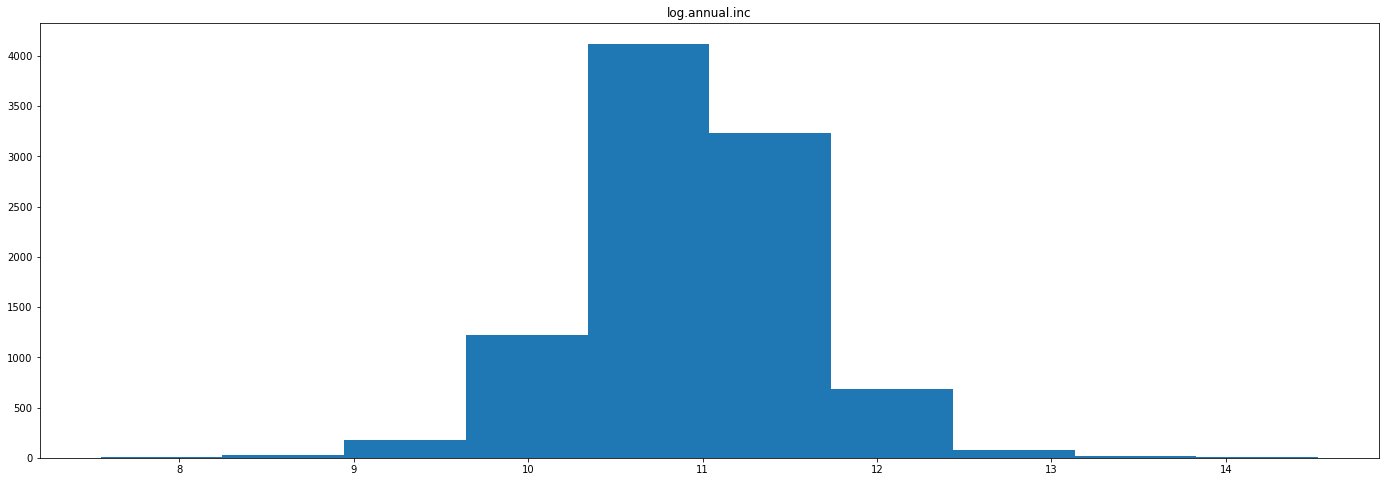

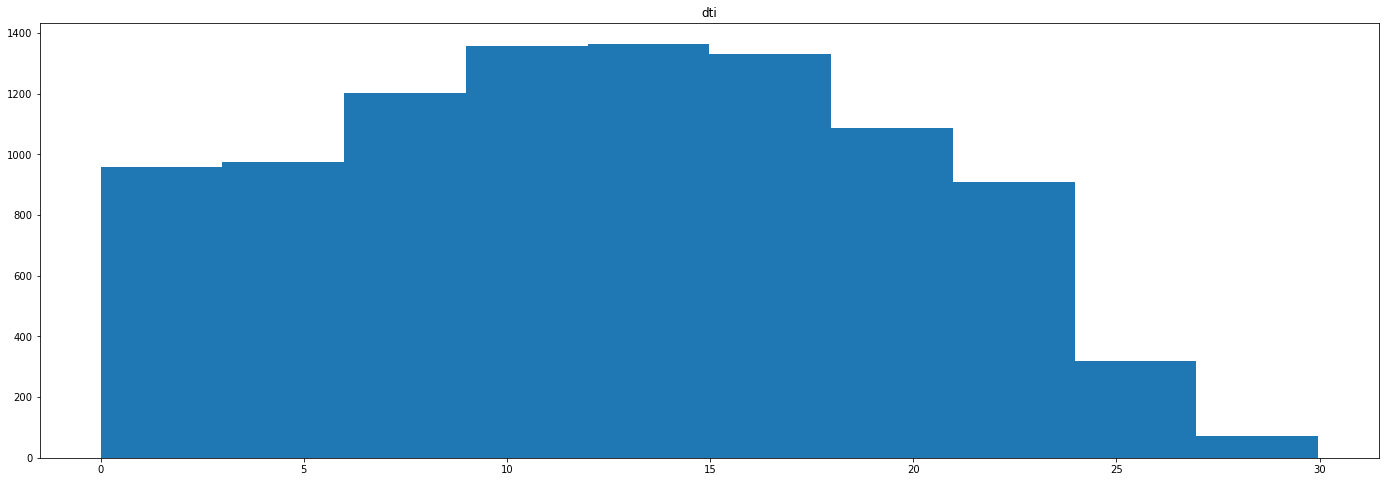

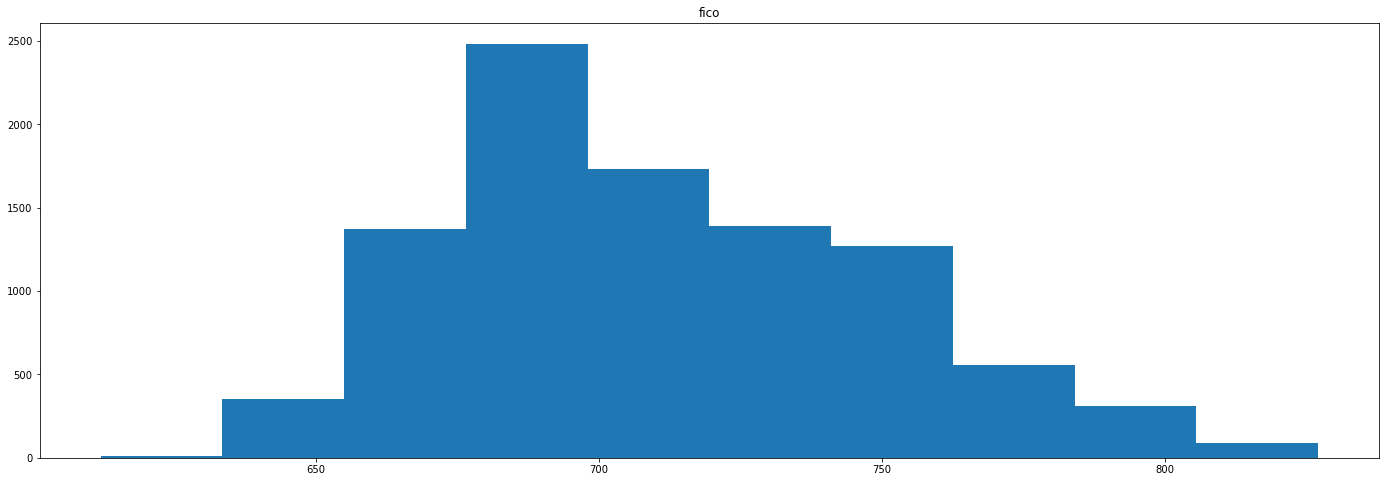

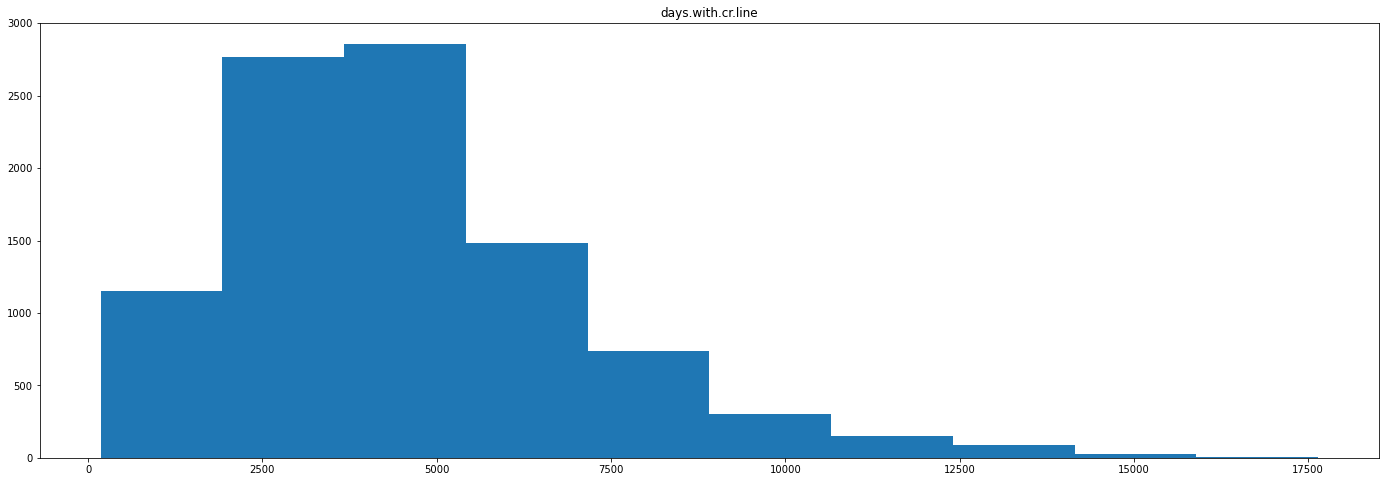

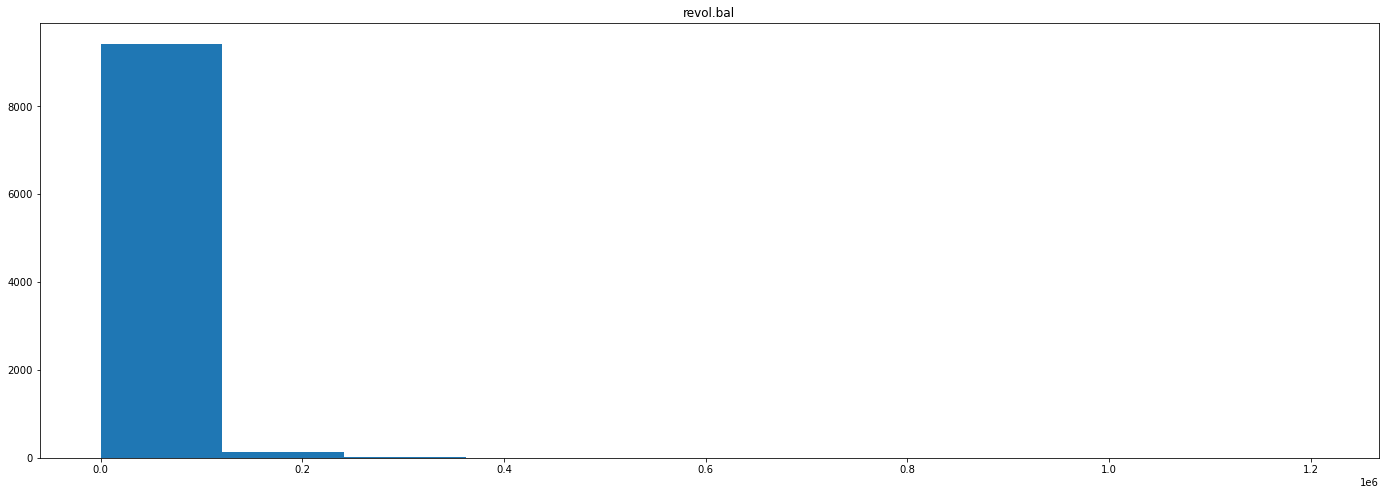

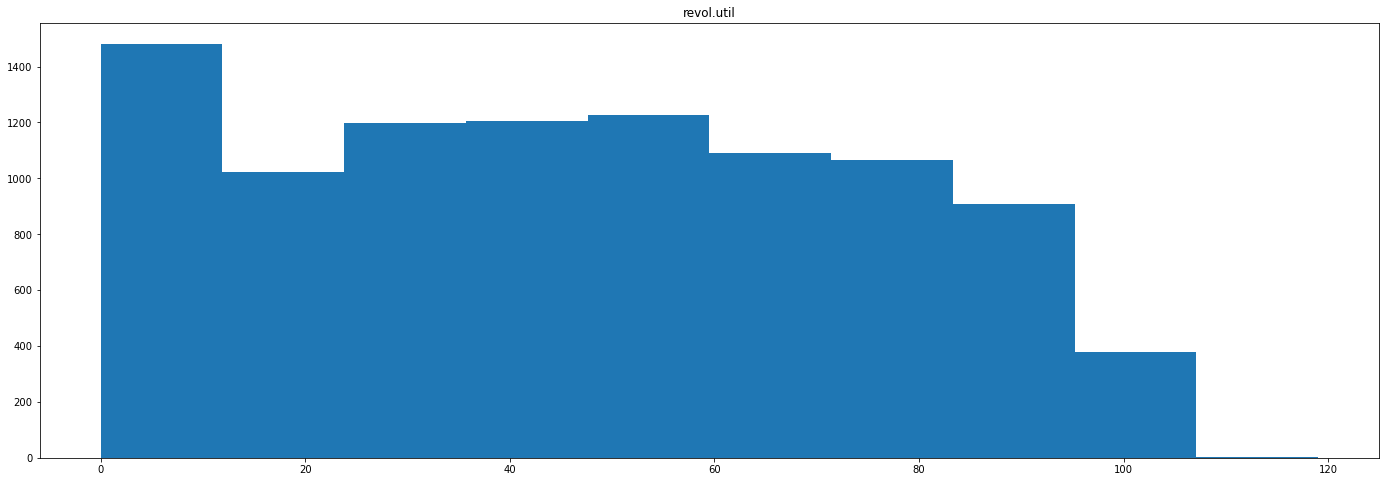

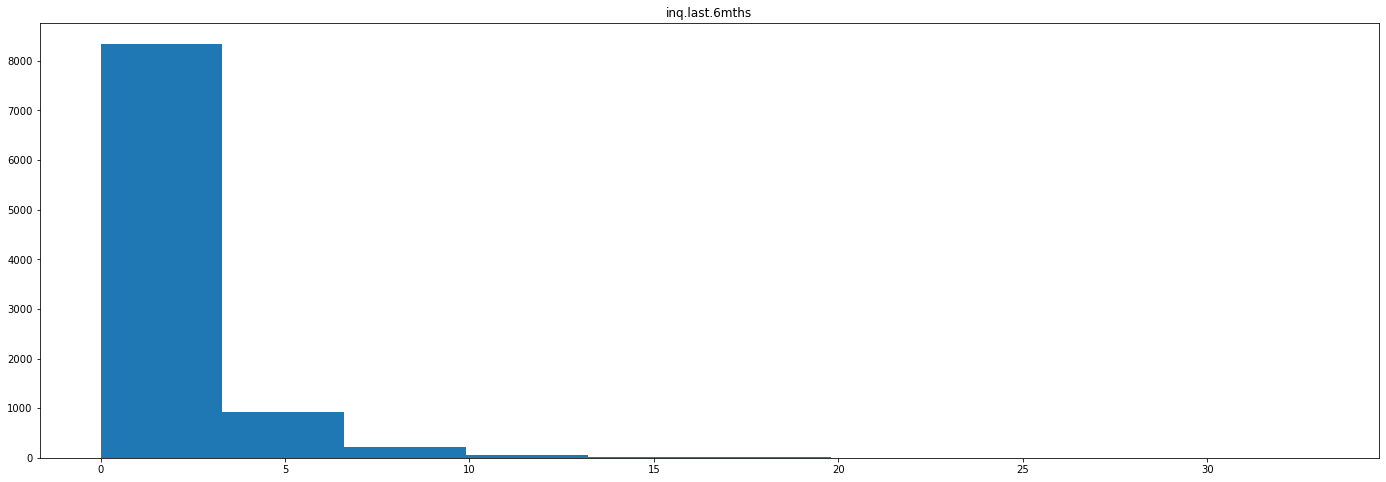

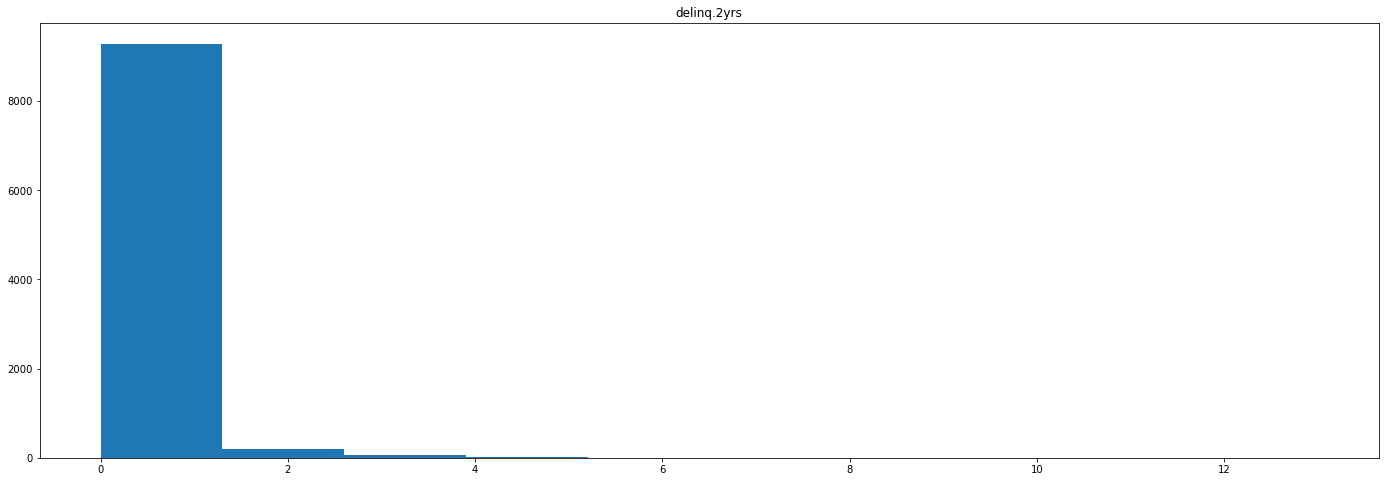

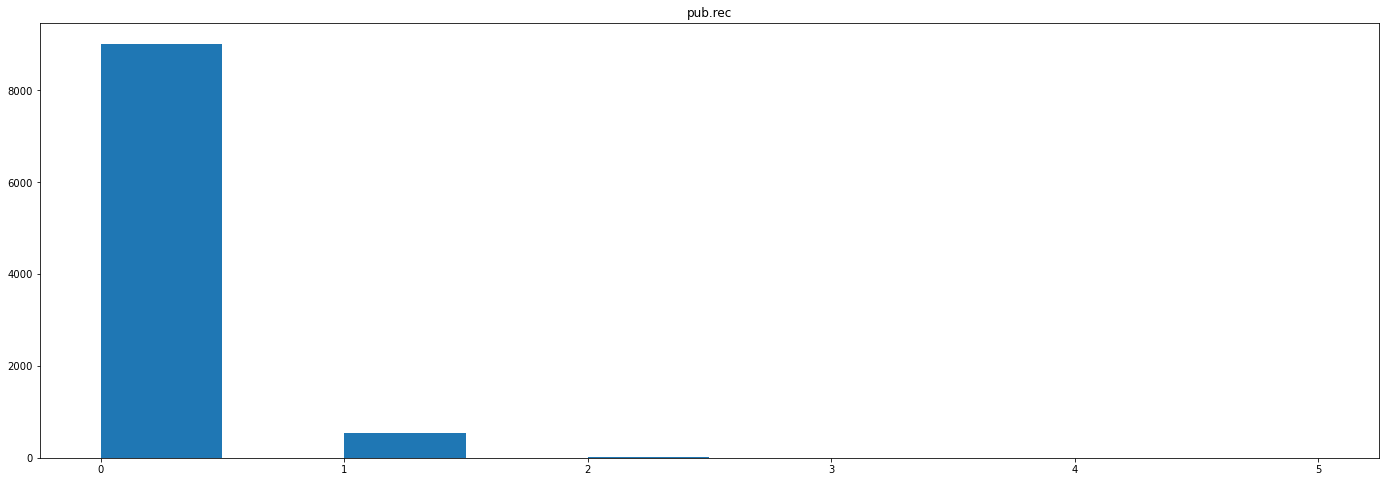

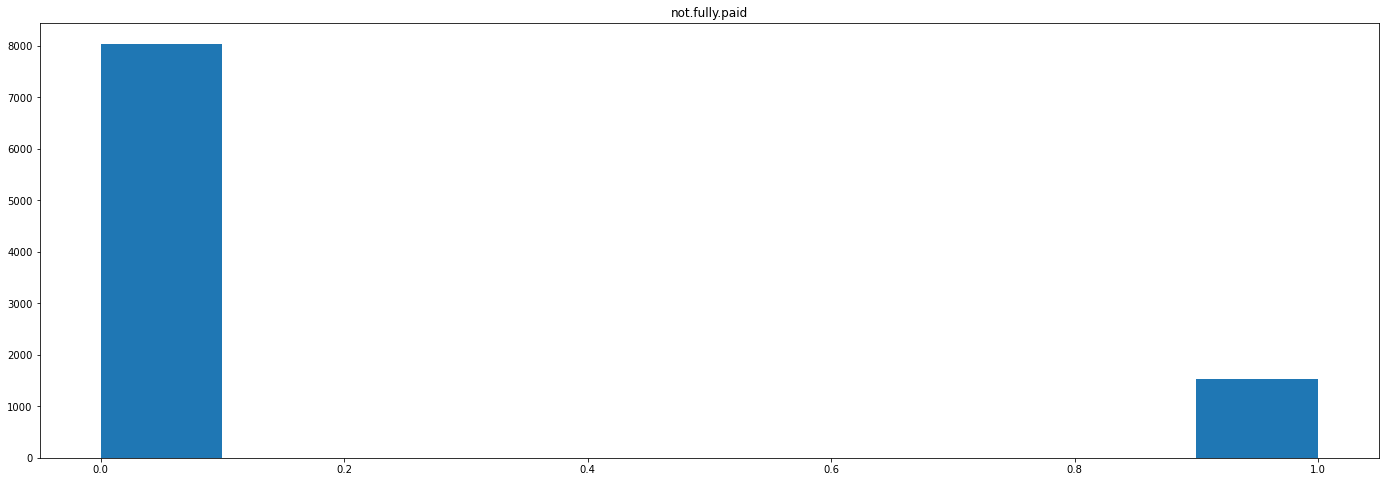

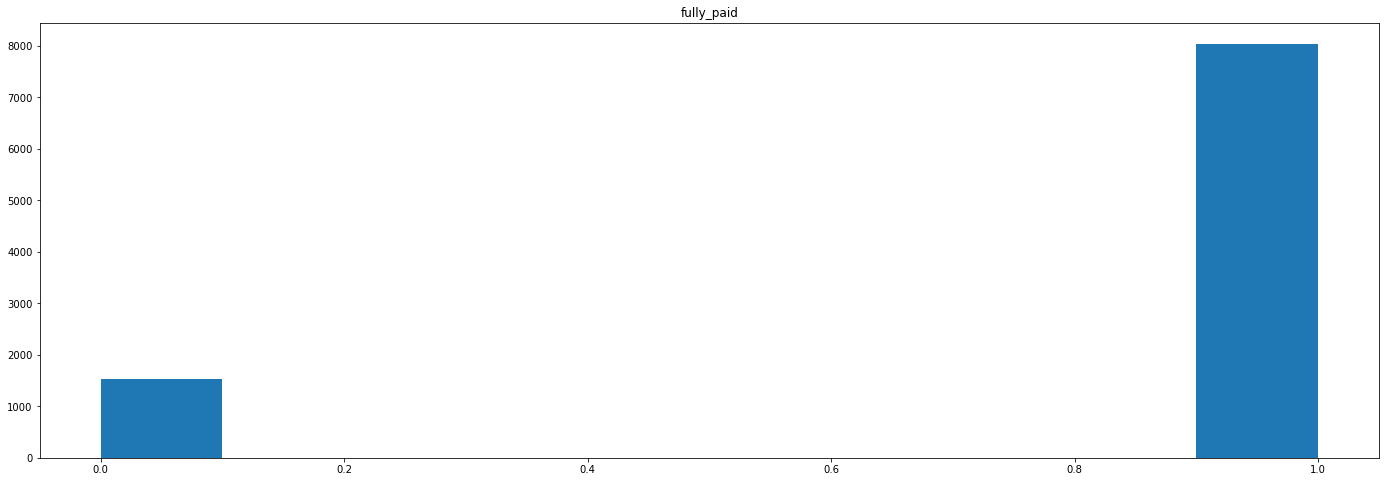

In [12]:
for col in loan_data_df.columns:
    plt.figure(figsize=(8 * 3, 8))
    plt.hist(loan_data_df[col])
    plt.title(col)
    plt.show()

## Correlation Analysis
> as we can see from this correlation table that the correlation between the close price and the other columns are quite high. but in this case i will only use some column to build the model.

In [13]:
loan_data_df.corr()['fully_paid'].abs().sort_values(ascending=False)

fully_paid           1.000000
not.fully.paid       1.000000
int.rate             0.159552
credit.policy        0.158119
fico                 0.149666
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
log.annual.inc       0.033439
days.with.cr.line    0.029237
delinq.2yrs          0.008881
Name: fully_paid, dtype: float64

# VI. Data Preprocessing
> in this section we will be splitting the data into training and validation and testing. and perform some data preprocessing to better suit the model.

In [14]:
regression_df = prices_split_adjusted_df[prices_split_adjusted_df['symbol'] == 'AMZN']
regression_df = regression_df.sample(frac=1).drop('symbol', axis=1)

In [15]:
n_test = 64

regression_train_x, regression_val_x, regression_train_y, regression_val_y = model_selection.train_test_split(
    regression_df[:-n_test].drop('close', axis=1), regression_df[:-n_test]['close'], test_size=0.2,
    random_state=42)
regression_test_x, regression_test_y = regression_df[-n_test:].drop('close', axis=1), regression_df[-n_test:]['close']

In [16]:
classifier_df = loan_data_df
classifier_df = classifier_df.sample(frac=1).reset_index(drop=True)

classifier_df.drop(['purpose'], axis=1, inplace=True)

classifier_train_x, classifier_val_x, classifier_train_y, classifier_val_y = model_selection.train_test_split(
    classifier_df[:-n_test], classifier_df[:-n_test]['fully_paid'], test_size=0.2,
    random_state=42)
classifier_test_x, classifier_test_y = classifier_df[-n_test:], classifier_df[-n_test:]['fully_paid']

# VII. Model Definition
> For this submission we will be using a linear regression model and a logistic regression model. one for regression and one for classification.

>> Pipeline setup

In [17]:
regression_preprocessing_pipeline = compose.ColumnTransformer(
    [('scaler', preprocessing.StandardScaler(), ['open', 'high', 'low', 'volume'])]
)

create_regression_pipeline = lambda model: pipeline.Pipeline([
    ('regression_preprocessing', regression_preprocessing_pipeline),
    ('regression_model', model)
])
linear_regression_model = linear_model.LinearRegression()
linear_regression_model_pipeline = create_regression_pipeline(linear_regression_model)

In [18]:
classifier_train_x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,fully_paid
7563,0,0.1600,87.90,8.673000,5.13,672,930.000000,727,72.7,3,0,0,0,1
6125,1,0.1600,421.89,10.896739,11.20,702,3945.958333,5418,33.9,3,0,0,1,0
1941,1,0.1442,515.74,11.225243,3.22,682,3180.041667,15137,43.6,0,2,0,0,1
4750,1,0.1379,68.16,10.880252,18.07,692,3329.958333,16306,95.9,0,0,0,0,1
3315,1,0.1379,381.65,11.195471,18.82,692,7560.041667,18384,43.5,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,0.0945,544.17,11.002100,0.60,762,3390.041667,653,3.2,2,0,0,0,1
5191,1,0.1166,231.37,10.691945,20.54,702,2339.958333,8507,56.7,0,1,0,0,1
5390,1,0.1379,391.87,10.734220,10.30,697,3659.958333,11361,35.3,0,3,0,0,1
860,1,0.1183,828.35,12.388394,14.77,757,3750.041667,51669,26.7,3,0,0,0,1


In [19]:
classifier_preprocessing_pipeline = compose.ColumnTransformer([
    ('binary_encoder', preprocessing.Binarizer(), ['credit.policy']),
    ('scaler', preprocessing.StandardScaler(), ['fico', 'int.rate', 'inq.last.6mths', 'revol.util', 'revol.bal', 'installment', 'pub.rec'])
])

create_classifier_pipeline = lambda model: pipeline.Pipeline([
    ('classifier_preprocessing', classifier_preprocessing_pipeline),
    ('classifier_model', model)
])

classifier_model = linear_model.LogisticRegression()
classifier_model_pipeline = create_classifier_pipeline(classifier_model)

# VIII. Model Training
> We will be using a grid search to find the best parameters for the model. and implement our own evaluator to evaluate the model. with those evaluator we can see mae, mse, mape for regression model and accuracy, precision, recall and f1 for classification model.

In [20]:
def linear_evaluator(y, _y):
    mae = metrics.mean_absolute_error(y, _y)
    mse = metrics.mean_squared_error(y, _y)
    mape = metrics.mean_absolute_percentage_error(y, _y)
    r2 = metrics.r2_score(y, _y)

    print('MAE:'.ljust(12), f'{mae:.2f}')
    print('MSE:'.ljust(12), f'{mse:.2f}')
    print('MAPE:'.ljust(12), f'{mape:.2f}')
    print('R2:'.ljust(12), f'{r2:.2f}')


def classifier_evaluator(y, _y):
    acc = metrics.accuracy_score(y, _y)
    prec = metrics.precision_score(y, _y)
    rec = metrics.recall_score(y, _y)
    f1 = metrics.f1_score(y, _y)

    print('Accuracy:'.ljust(12), f'{acc:.2f}')
    print('Precision:'.ljust(12), f'{prec:.2f}')
    print('Recall:'.ljust(12), f'{rec:.2f}')
    print('F1 Score:'.ljust(12), f'{f1:.2f}')

In [21]:
linear_regression_model_pipeline.fit(regression_train_x, regression_train_y)
_y = linear_regression_model_pipeline.predict(regression_train_x)
linear_evaluator(regression_train_y, _y)

MAE:         1.56
MSE:         4.92
MAPE:        0.01
R2:          1.00


>> From the evaluation we can say that the model perform quite well. and no sign of overfitting.

In [22]:
_y = linear_regression_model_pipeline.predict(regression_val_x)
linear_evaluator(regression_val_y, _y)

MAE:         1.62
MSE:         5.17
MAPE:        0.01
R2:          1.00


In [23]:
regression_val_x

,open,low,high,volume
date,,,,
2016-08-01,759.869995,757.059998,770.500000,3578200.0
2016-01-19,577.090027,566.450012,584.000000,4807200.0
2016-07-27,737.969971,733.859985,740.940002,2913100.0
2014-01-07,395.040009,394.290009,398.470001,1916000.0
2016-06-03,726.739990,718.429993,727.000000,3367300.0
...,...,...,...,...
2015-11-09,658.650024,647.849976,661.960022,4048800.0
2011-10-03,217.009995,211.389999,221.600006,6624400.0
2010-03-18,131.020004,130.440002,132.850006,5021300.0


>> let's plot the predicted values and actual values side by side

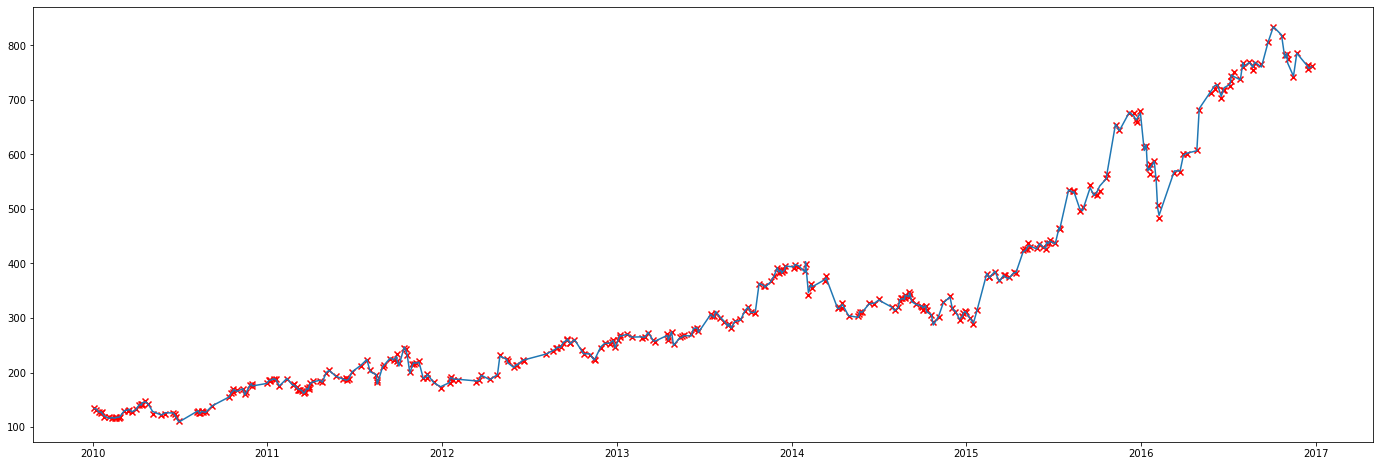

In [24]:
def evaluate_regression_model(model):
    _trend = regression_val_x.sort_values(by='date', ascending=True)
    _y = model.predict(_trend)

    plt.figure(figsize=(8 * 3, 8))
    plt.plot(_trend.index, regression_val_y[_trend.index], label='actual')
    plt.scatter(_trend.index, _y, marker='x', c=['r'], label='prediction')


evaluate_regression_model(linear_regression_model_pipeline)

In [25]:
classifier_model_pipeline.fit(classifier_train_x, classifier_train_y)
_y = classifier_model_pipeline.predict(classifier_train_x)
classifier_evaluator(classifier_train_y, _y)

Accuracy:    0.84
Precision:   0.84
Recall:      1.00
F1 Score:    0.91


>> Same af before the clasification perform significantly better by scoring .91 in validation data

In [26]:
_y = classifier_model_pipeline.predict(classifier_val_x)
classifier_evaluator(classifier_val_y, _y)

Accuracy:    0.85
Precision:   0.85
Recall:      1.00
F1 Score:    0.92


In [27]:
_y = classifier_model_pipeline.predict(classifier_test_x)
classifier_evaluator(classifier_test_y, _y)

pd.DataFrame({'actual': classifier_test_y, 'prediction': _y, 'correct': classifier_test_y == _y})

Accuracy:    0.86
Precision:   0.86
Recall:      1.00
F1 Score:    0.92


,actual,prediction,correct
9514,1,1,True
9515,1,1,True
9516,1,1,True
9517,1,1,True
9518,1,1,True
...,...,...,...
9573,1,1,True
9574,1,1,True
9575,1,1,True
9576,0,1,False


# IX. Model Evaluation
In this section we will be try to optimize the model using grid search and cross validation to inprove the model.

In [28]:
linear_model_gs = model_selection.GridSearchCV(
    linear_regression_model,
    param_grid={
        'normalize': [True, False],
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'n_jobs': [1, 2, 4]
    },
    scoring='neg_mean_squared_error',
    return_train_score=True)

linear_model_gs.fit(regression_train_x, regression_train_y)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, 2, 4],
                         'normalize': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
tuned_linear_model = linear_model_gs.best_estimator_

In [30]:
_y = tuned_linear_model.predict(regression_train_x)
linear_evaluator(regression_train_y, _y)

MAE:         1.56
MSE:         4.92
MAPE:        0.01
R2:          1.00


>> From the evaluation we can see that the model perform the same as our previous model. so baseline model are quite optimal.

In [31]:
_y = tuned_linear_model.predict(regression_val_x)
linear_evaluator(regression_val_y, _y)

MAE:         1.62
MSE:         5.17
MAPE:        0.01
R2:          1.00


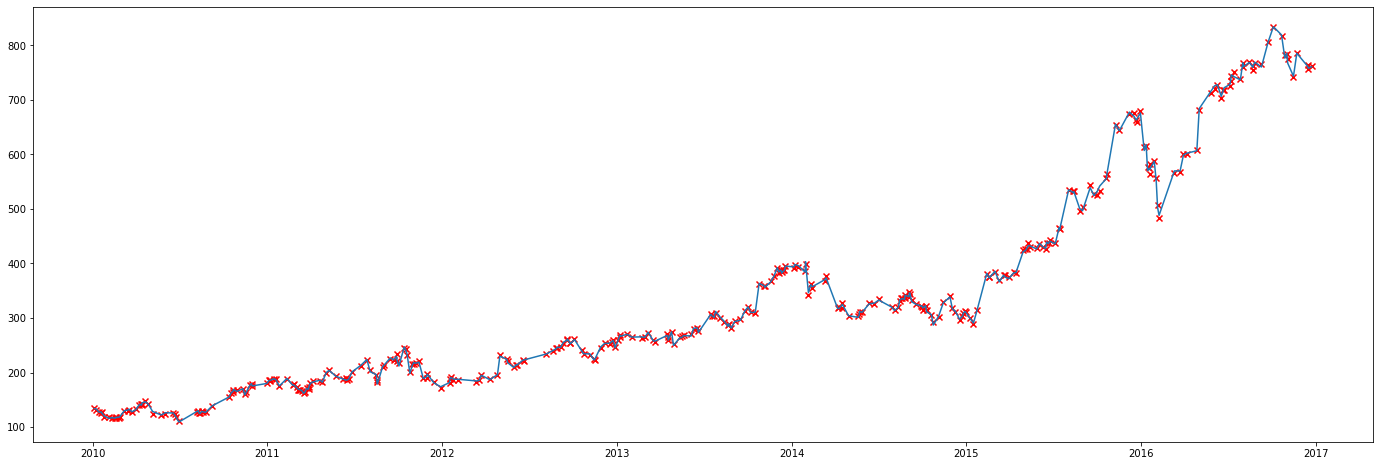

In [32]:
evaluate_regression_model(tuned_linear_model)

In [33]:
classifier_model_gs = model_selection.GridSearchCV(
    classifier_model,
    param_grid={
        'C': [0.1, 1, 10, 100, 1000],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    scoring='accuracy',
    return_train_score=True,
    verbose=1
)


classifier_model_gs.fit(classifier_train_x, classifier_train_y)
classifier_model_tuned = create_classifier_pipeline(classifier_model_gs.best_estimator_)

_y = classifier_model_gs.predict(classifier_train_x)
classifier_evaluator(classifier_train_y, _y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to co

Accuracy:    1.00
Precision:   1.00
Recall:      1.00
F1 Score:    1.00


>> From the Observation we can see that the model perform Very well. because it score 100% in training data and 100% in validation data. so the model is very good fit

In [34]:
_y = classifier_model_gs.predict(classifier_val_x)
classifier_evaluator(classifier_val_y, _y)

Accuracy:    1.00
Precision:   1.00
Recall:      1.00
F1 Score:    1.00


# X. Model Prediction
Lets test out model with test data and see if we can see some anomaly

In [35]:
_y = linear_model_gs.predict(regression_test_x)
linear_evaluator(regression_test_y, _y)

MAE:         1.68
MSE:         6.88
MAPE:        0.00
R2:          1.00


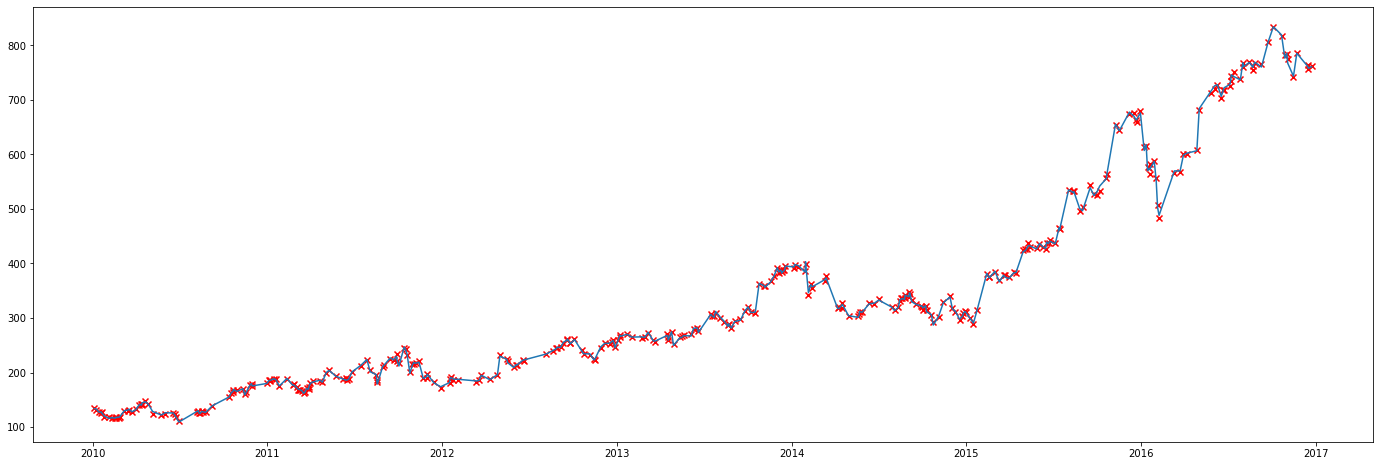

In [36]:
evaluate_regression_model(linear_model_gs)

In [37]:
_y = classifier_model_gs.predict(classifier_test_x)
classifier_evaluator(classifier_test_y, _y)

pd.DataFrame({'actual': classifier_test_y, 'prediction': _y, 'correct': classifier_test_y == _y})

Accuracy:    1.00
Precision:   1.00
Recall:      1.00
F1 Score:    1.00


,actual,prediction,correct
9514,1,1,True
9515,1,1,True
9516,1,1,True
9517,1,1,True
9518,1,1,True
...,...,...,...
9573,1,1,True
9574,1,1,True
9575,1,1,True
9576,0,0,True


# Analysis
after all we're done cleaning the data selecting feature and creating model we can see that building machine learning model is a very complex task.
and from the experience above we can say that certain model perform better than others. and with hyper parameter tuning we can improve the model. to significant level